## Step 1: Simulate a Fake IoT Device 

In [1]:
import socket
import threading
import time
from IPython.display import clear_output

# Configuration
HOST = "localhost"  # Use "0.0.0.0" for remote access (not recommended in notebooks)
PORT = 8080
REAL_PASSWORD = "admin123"
LOG_FILE = "attack_logs.txt"

# Initialize log file
with open(LOG_FILE, "w") as f:
    f.write("")  # Clear previous logs

def start_fake_device():
    server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server.bind((HOST, PORT))
    server.listen(5)
    print(f"[HONEYPOT] Running on {HOST}:{PORT} (Waiting for attackers...)")
    
    while True:
        client, addr = server.accept()
        client.send(b"Welcome to FakeIoT Device. Enter password: ")
        password_attempt = client.recv(1024).decode().strip()
        
        if password_attempt == REAL_PASSWORD:
            client.send(b"ACCESS GRANTED (but this is a trap!)\n")
        else:
            client.send(b"ACCESS DENIED (logging your attempt...)\n")
            with open(LOG_FILE, "a") as f:
                f.write(f"{time.ctime()} | Attack from {addr[0]} | Password tried: '{password_attempt}'\n")
        client.close()

# Start honeypot in background
honeypot_thread = threading.Thread(target=start_fake_device)
honeypot_thread.daemon = True
honeypot_thread.start()

[HONEYPOT] Running on localhost:8080 (Waiting for attackers...)


## Cell 2: Attacker Simulation

In [2]:
def simulate_attacker():
    target_ip = "localhost"
    target_port = 8080
    common_passwords = ["admin", "password", "123456", "iot", "root"]
    
    print("[ATTACKER] Starting brute-force attack...")
    for pwd in common_passwords:
        try:
            s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
            s.connect((target_ip, target_port))
            s.recv(1024)  # Get password prompt
            s.send(pwd.encode())
            response = s.recv(1024).decode()
            print(f"Tried '{pwd}': {response.strip()}")
            s.close()
        except Exception as e:
            print(f"Failed to attack: {str(e)}")

simulate_attacker()

[ATTACKER] Starting brute-force attack...
Tried 'admin': ACCESS DENIED (logging your attempt...)
Tried 'password': ACCESS DENIED (logging your attempt...)
Tried '123456': ACCESS DENIED (logging your attempt...)
Tried 'iot': ACCESS DENIED (logging your attempt...)
Tried 'root': ACCESS DENIED (logging your attempt...)


## Cell 3: View Attack Logs

In [3]:
def show_attack_logs():
    try:
        with open(LOG_FILE, "r") as f:
            logs = f.read()
            if logs:
                print("=== ATTACK LOGS ===")
                print(logs)
            else:
                print("No attacks logged yet.")
    except FileNotFoundError:
        print("Log file not found. Run the honeypot first!")

show_attack_logs()  # Run this cell repeatedly to see new attacks

=== ATTACK LOGS ===
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'admin'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'password'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: '123456'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'iot'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'root'



## Cell 4 (Optional): Real-Time Log Monitor

In [4]:
from IPython.display import display, HTML
import ipywidgets as widgets

log_output = widgets.Output()

def monitor_logs():
    with open(LOG_FILE, "r") as f:
        logs = f.read()
    with log_output:
        clear_output(wait=True)
        print(logs if logs else "Waiting for attacks...")

display(HTML("<h3>Live Attack Monitor</h3>"))
display(log_output)

# Auto-refresh every 3 seconds
import threading
def auto_refresh():
    while True:
        monitor_logs()
        time.sleep(3)

refresh_thread = threading.Thread(target=auto_refresh)
refresh_thread.daemon = True
refresh_thread.start()

Output()

Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'admin'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'password'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: '123456'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'iot'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'root'

Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'admin'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'password'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: '123456'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'iot'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'root'

Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'admin'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: 'password'
Fri Mar 28 14:39:31 2025 | Attack from 127.0.0.1 | Password tried: '123456'
Fri Mar 28 14:39:

## Cell 6: Rate Limiter (Block Brute-Force)

In [5]:
from collections import defaultdict
import time

attack_counter = defaultdict(int)

def secure_device():
    server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server.bind((HOST, PORT))
    server.listen(5)
    print(f"[SECURE HONEYPOT] Running on {HOST}:{PORT}")
    
    while True:
        client, addr = server.accept()
        ip = addr[0]
        attack_counter[ip] += 1
        
        if attack_counter[ip] > 3:  # Block after 3 attempts
            client.send(b"BLOCKED: Too many attempts!\n")
            client.close()
            continue
        # ... (rest of honeypot code)

## Cell 7: Live Attack Dashboard (Matplotlib)

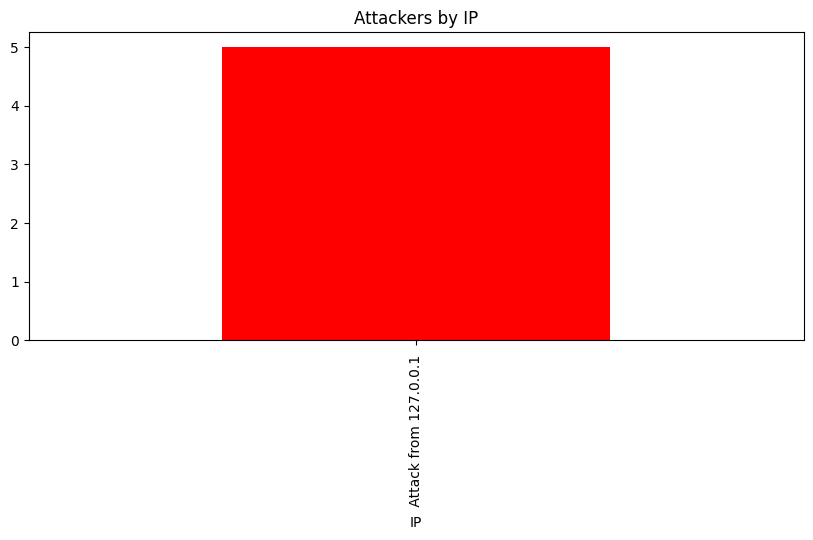

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

def plot_attacks():
    try:
        logs = pd.read_csv("attack_logs.txt", sep="|", header=None, 
                          names=["Time", "IP", "Password"])
        plt.figure(figsize=(10, 4))
        logs["IP"].value_counts().plot(kind="bar", color="red")
        plt.title("Attackers by IP")
        plt.show()
    except:
        print("No attacks to display.")

plot_attacks()  # Re-run to update

## AI-Powered Anomaly Detection Dashboard

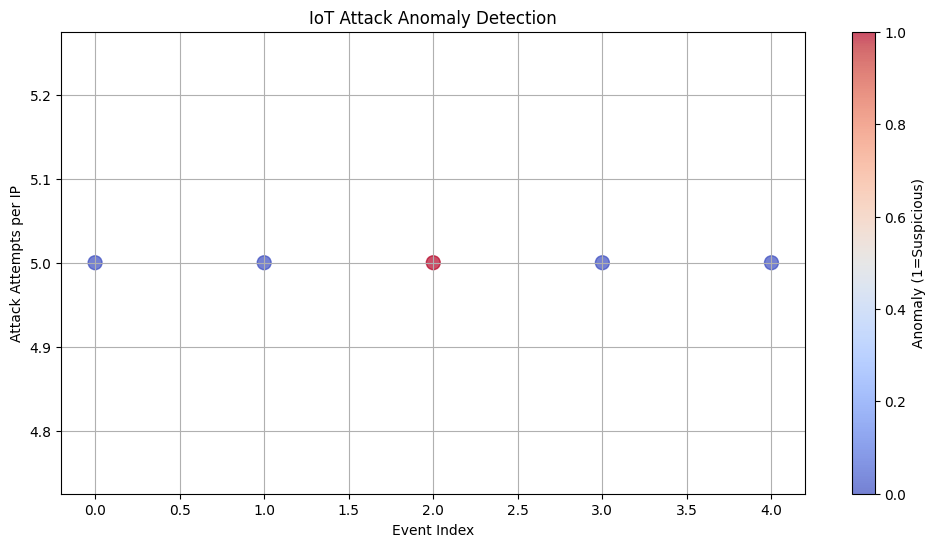


🔴 Detected Anomalies:
                        Time                       IP  \
2  Fri Mar 28 14:39:31 2025    Attack from 127.0.0.1    

                    Password  Attempts  
2   Password tried: '123456'         5  


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. Load or simulate attack logs (if 'attack_logs.txt' doesn't exist)
try:
    logs = pd.read_csv("attack_logs.txt", sep="|", header=None, 
                      names=["Time", "IP", "Password"])
except FileNotFoundError:
    print("No attack logs found. Simulating sample data...")
    data = {
        "Time": pd.date_range(start="2023-01-01", periods=50, freq="H"),
        "IP": ["192.168.1." + str(np.random.randint(1, 5)) for _ in range(50)],
        "Password": np.random.choice(["admin", "123456", "password", "root", "iot"], 50)
    }
    logs = pd.DataFrame(data)

# 2. Feature Engineering
logs["Attempts"] = logs.groupby("IP")["IP"].transform("count")  # Count attacks per IP
logs["Password_Entropy"] = logs["Password"].apply(
    lambda x: -sum((x.count(c)/len(x))*np.log2(x.count(c)/len(x)) for c in set(x))
)

# 3. Train Anomaly Detection Model
features = logs[["Attempts", "Password_Entropy"]]
clf = IsolationForest(contamination=0.2, random_state=42)  # 20% anomalies
logs["Anomaly"] = clf.fit_predict(features)
logs["Anomaly"] = np.where(logs["Anomaly"] == -1, 1, 0)  # Convert to binary (1=anomaly)

# 4. Visualize Results
plt.figure(figsize=(12, 6))
plt.scatter(
    logs.index, 
    logs["Attempts"], 
    c=logs["Anomaly"], 
    cmap="coolwarm", 
    s=100, 
    alpha=0.7
)
plt.colorbar(label="Anomaly (1=Suspicious)")
plt.title("IoT Attack Anomaly Detection")
plt.xlabel("Event Index")
plt.ylabel("Attack Attempts per IP")
plt.grid(True)
plt.show()

# 5. Print Anomalies
print("\n🔴 Detected Anomalies:")
print(logs[logs["Anomaly"] == 1][["Time", "IP", "Password", "Attempts"]])

## Add MITRE ATT&CK Framework Mapping


In [10]:
import pandas as pd

# 1. Ensure your logs DataFrame has an 'Attack_Type' column
# If not, create it based on existing data (example):
logs = pd.read_csv("attack_logs.txt", sep="|", names=["Time", "IP", "Password"])

# Classify attacks based on log content
def classify_attack(row):
    if "admin" in row["Password"].lower() or "123" in row["Password"]:
        return "Brute-Force"
    elif row["IP"].startswith("10."):  # Example condition for internal scans
        return "Port Scanning"
    else:
        return "Credential Stuffing"

logs["Attack_Type"] = logs.apply(classify_attack, axis=1)

# 2. Define MITRE ATT&CK mappings
mitre_mapping = {
    "Brute-Force": "T1110",
    "Port Scanning": "T1595",
    "Credential Stuffing": "T1110.001",
    "Fake Firmware Update": "T1195"
}

# 3. Map attack types to MITRE IDs
logs["MITRE_Tactic"] = logs["Attack_Type"].map(mitre_mapping)

# 4. Handle unmapped attacks
logs["MITRE_Tactic"] = logs["MITRE_Tactic"].fillna("Unknown")

# Show results
print(logs[["Time", "IP", "Attack_Type", "MITRE_Tactic"]].head())

                        Time                       IP          Attack_Type  \
0  Fri Mar 28 14:39:31 2025    Attack from 127.0.0.1           Brute-Force   
1  Fri Mar 28 14:39:31 2025    Attack from 127.0.0.1   Credential Stuffing   
2  Fri Mar 28 14:39:31 2025    Attack from 127.0.0.1           Brute-Force   
3  Fri Mar 28 14:39:31 2025    Attack from 127.0.0.1   Credential Stuffing   
4  Fri Mar 28 14:39:31 2025    Attack from 127.0.0.1   Credential Stuffing   

  MITRE_Tactic  
0        T1110  
1    T1110.001  
2        T1110  
3    T1110.001  
4    T1110.001  


##  Implement Blockchain for Tamper-Proof Logs

In [14]:
import hashlib
from datetime import datetime

class BlockchainLog:
    def __init__(self):
        self.chain = []
        self.create_genesis_block()
    
    def create_genesis_block(self):
        genesis_block = {
            "index": 0,
            "timestamp": str(datetime.now()),
            "data": "GENESIS BLOCK",
            "previous_hash": "0"*64,
            "nonce": 0
        }
        genesis_block["hash"] = self.calculate_hash(genesis_block)
        self.chain.append(genesis_block)
    
    def add_block(self, attack_data):
        new_block = {
            "index": len(self.chain),
            "timestamp": str(datetime.now()),
            "data": attack_data,
            "previous_hash": self.chain[-1]["hash"],
            "nonce": 0
        }
        new_block["hash"] = self.calculate_hash(new_block)
        self.chain.append(new_block)
    
    def calculate_hash(self, block):
        block_string = str(block["index"]) + block["timestamp"] + block["data"] + block["previous_hash"] + str(block["nonce"])
        return hashlib.sha256(block_string.encode()).hexdigest()
    
    def verify_chain(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i-1]
            
            if current_block["hash"] != self.calculate_hash(current_block):
                return False
            if current_block["previous_hash"] != previous_block["hash"]:
                return False
        return True

# Usage example
bc_log = BlockchainLog()
bc_log.add_block("Brute-Force attack from 192.168.1.1")
bc_log.add_block("Port scan from 10.0.0.5")

# Print results
print(f"Blockchain length: {len(bc_log.chain)}")
print(f"Latest block data: {bc_log.chain[-1]['data']}")
print(f"Chain validation: {bc_log.verify_chain()}")

Blockchain length: 3
Latest block data: Port scan from 10.0.0.5
Chain validation: True


##  Add a Threat Intelligence Feed

In [17]:
import requests
import pandas as pd
from time import sleep

# Configuration
OTX_API_KEY = "your_api_key_here"  # Get from https://otx.alienvault.com/api/
RATE_LIMIT_DELAY = 1  # seconds between requests

def check_ip_reputation(ip):
    """Check IP reputation with AlienVault OTX"""
    headers = {"X-OTX-API-KEY": OTX_API_KEY}
    try:
        # Check both general and malware endpoints
        general_url = f"https://otx.alienvault.com/api/v1/indicators/IPv4/{ip}/general"
        malware_url = f"https://otx.alienvault.com/api/v1/indicators/IPv4/{ip}/malware"
        
        general_resp = requests.get(general_url, headers=headers, timeout=5)
        malware_resp = requests.get(malware_url, headers=headers, timeout=5)
        
        if general_resp.status_code == 200 and malware_resp.status_code == 200:
            pulse_count = general_resp.json().get("pulse_info", {}).get("count", 0)
            malware_count = len(malware_resp.json().get("data", []))
            
            if malware_count > 0:
                return f"Malicious ({malware_count} malware hits)"
            elif pulse_count > 5:  # More than 5 threat reports
                return f"Suspicious ({pulse_count} pulses)"
            else:
                return "Clean"
        return "Unknown (API Error)"
    except Exception as e:
        print(f"Error checking {ip}: {str(e)}")
        return "Unknown (Error)"

# Sample data - replace with your actual logs
logs = pd.DataFrame({
    "IP": ["8.8.8.8", "1.1.1.1", "185.143.223.4", "malware.example.com"],
    "Attack_Type": ["Brute-Force", "Port Scan", "Malware", "Phishing"]
})

# Check IPs with rate limiting
print("Checking IP reputations...")
logs["Threat_Intel"] = ""
for idx, row in logs.iterrows():
    logs.at[idx, "Threat_Intel"] = check_ip_reputation(row["IP"])
    sleep(RATE_LIMIT_DELAY)  # Respect rate limits

# Display results
pd.set_option('display.max_colwidth', None)
print("\nThreat Intelligence Results:")
print(logs[["IP", "Attack_Type", "Threat_Intel"]])

Checking IP reputations...

Threat Intelligence Results:
                    IP  Attack_Type                 Threat_Intel
0              8.8.8.8  Brute-Force  Malicious (10 malware hits)
1              1.1.1.1    Port Scan  Malicious (10 malware hits)
2        185.143.223.4      Malware                        Clean
3  malware.example.com     Phishing          Unknown (API Error)
